In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

C:\Users\christo.strydom\github_repos\automation\CBR\Copy of 20210104_Master_Gap_CBR_LE_CS.xlsx

In [3]:
import pandas as pd
import openpyxl
import win32com.client

In [4]:
from datetime import datetime, timedelta
from dateutil.relativedelta import *

In [5]:
import calendar
import dateutil.parser

In [6]:
def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year,month)[1])
    return datetime.date(year, month, day)

def last_day_of_month_fn(any_day):
    # this will never fail
    # get close to the end of the month for any day, and add 4 days 'over'
    next_month = any_day.replace(day=28) + timedelta(days=4)
    # subtract the number of remaining 'overage' days to get last day of current month, or said programattically said, the previous day of the first of next month
    return next_month - timedelta(days=next_month.day)

In [7]:
# path="C:\\Users\\christo.strydom\\github_repos\\automation\\OWLS_data\\"
# owls_claims='Claim_Raw_new.csv' # fixed dates.
# owls_members='Active_Listing_Raw.csv' # 
# owls_terminations='terminations_raw.csv'
# owls_received_claims='received_claims.csv'

### VS Data

In [8]:
path_downloads="C:\\Users\\christo.strydom\\Downloads\\"

In [ ]:
"	(SELECT COUNT(*) FROM policy WHERE ( 
			(cancellationdate IS NULL AND DATE_FORMAT(inceptiondate, '%Y/%m/%d') < DATE_FORMAT(NOW(), '%Y/%m/01'))
			OR DATE_FORMAT(cancellationdate, '%Y/%m/01')=DATE_FORMAT(NOW() - INTERVAL 1 MONTH, '%Y/%m/01')
		) AND currenthistoryflag='CURRENT' "

In [9]:
policy_CENSAN_3months_20210317='policy_CENSAN_3months_20210317.csv' # 
policy_CENSAN_2months_20210317='policy_CENSAN_2months_20210317.csv' # 
policy_CENSAN_1months_20210317='policy_CENSAN_1months_20210317.csv' # 

In [10]:
policy_cancelled_CENSAN_3months_20210317='policy_cancelled_CENSAN_3months_20210317.csv' # 
policy_cancelled_CENSAN_2months_20210317='policy_cancelled_CENSAN_2months_20210317.csv' # 
policy_cancelled_CENSAN_1months_20210317='policy_cancelled_CENSAN_1months_20210317.csv' # 

In [11]:
policy_new_CENSAN_3months_20210317='policy_new_CENSAN_3months_20210317.csv' # 
policy_new_CENSAN_2months_20210317='policy_new_CENSAN_2months_20210317.csv' # 
policy_new_CENSAN_1months_20210317='policy_new_CENSAN_1months_20210317.csv' # 

In [12]:
policy_CENSAN_3months_20210317_df=pd.read_csv(filepath_or_buffer=path_downloads+policy_CENSAN_3months_20210317)
policy_CENSAN_2months_20210317_df=pd.read_csv(filepath_or_buffer=path_downloads+policy_CENSAN_2months_20210317)
policy_CENSAN_1months_20210317_df=pd.read_csv(filepath_or_buffer=path_downloads+policy_CENSAN_1months_20210317)

C:\Users\christo.strydom\Anaconda3\envs\automation\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (13,29,49,69,118,194,222,242,243,298) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
policy_cancelled_CENSAN_3months_20210317_df=pd.read_csv(filepath_or_buffer=path_downloads+policy_cancelled_CENSAN_3months_20210317)
policy_cancelled_CENSAN_2months_20210317_df=pd.read_csv(filepath_or_buffer=path_downloads+policy_cancelled_CENSAN_2months_20210317)
policy_cancelled_CENSAN_1months_20210317_df=pd.read_csv(filepath_or_buffer=path_downloads+policy_cancelled_CENSAN_1months_20210317)

In [14]:
policy_new_CENSAN_3months_20210317_df=pd.read_csv(filepath_or_buffer=path_downloads+policy_new_CENSAN_3months_20210317)
policy_new_CENSAN_2months_20210317_df=pd.read_csv(filepath_or_buffer=path_downloads+policy_new_CENSAN_2months_20210317)
policy_new_CENSAN_1months_20210317_df=pd.read_csv(filepath_or_buffer=path_downloads+policy_new_CENSAN_1months_20210317)

In [114]:
CENSAN_new_policies_20210201_2021_0318='CENSAN_new_policies_20210201_2021_0318.csv' # 
OWLS_all_policies_20210101_20210318='OWLS_all_policies_20210101_20210318.csv' # 

In [115]:
CENSAN_new_policies_20210201_2021_0318_df=pd.read_csv(filepath_or_buffer=path_downloads+CENSAN_new_policies_20210201_2021_0318)
OWLS_all_policies_20210101_20210318_df=pd.read_csv(filepath_or_buffer=path_downloads+OWLS_all_policies_20210101_20210318)

In [118]:
OWLS_all_policies_20210101_20210318_df[OWLS_all_policies_20210101_20210318_df.policynumber.isin(CENSAN_new_policies_20210201_2021_0318_df.policynumber)]

,inceptiondate_month,interval_2_month,policynumber
406,2021/02/01,2021/01/01,SAN712932
910,2021/02/01,2021/01/01,SAN732854
915,2021/02/01,2021/01/01,SAN733678
936,2021/02/01,2021/01/01,SAN734229
970,2021/02/01,2021/01/01,SAN735596
...,...,...,...
23834,2021/02/01,2021/01/01,SAN809871
23865,2021/02/01,2021/01/01,SAN773122
23872,2021/02/01,2021/01/01,SAN728063
23874,2021/02/01,2021/01/01,SAN788819


In [16]:
len(set(policy_CENSAN_2months_20210317_df.policynumber)-set(policy_CENSAN_1months_20210317_df.policynumber))

171

In [17]:
policy_CENSAN_2months_20210317_df.shape

(23948, 304)

In [18]:
policy_cancelled_CENSAN_2months_20210317_df.shape

(171, 304)

In [19]:
policy_new_CENSAN_2months_20210317_df.shape

(854, 304)

In [66]:
fig_path='C:\\Users\\christo.strydom\\github_repos\\automation\\img\\'

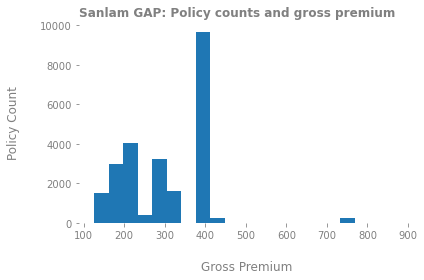

In [73]:
fig, ax = plt.subplots(tight_layout=True)
hist = policy_CENSAN_1months_20210317_df['grosspremium'].hist(bins=21,ax=ax,alpha=1)
# hist = policy_CENSAN_2months_20210317_df['grosspremium'].hist(bins=21,alpha=0.5)
# hist = policy_CENSAN_3months_20210317_df['grosspremium'].hist(bins=21,alpha=0.2)
fontdict={'fontsize': 12,
 'fontweight': 2,
 'color': 'grey',
 'verticalalignment': 'baseline',
 'horizontalalignment': 'left'}
ax.set_title("Sanlam GAP: Policy counts and gross premium", weight='bold', size=12, loc='left',color='grey')
ax.set_xlabel("Gross Premium", labelpad=20, size=12)
ax.set_ylabel("Policy Count", labelpad=20, size=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.label.set_color('grey')
ax.yaxis.label.set_color('grey')
# Hide grid lines
ax.grid(False)
ax.spines['bottom'].set_color('red')
# ax.spines['top'].set_color('red')
ax.xaxis.label.set_color('grey')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.set_xlabel("Gross Premium", labelpad=20, size=12)
ax.set_ylabel("Policy Count", labelpad=20, size=12)
plt.savefig('C:\\Users\\christo.strydom\\github_repos\\automation\\img\\'+'sanlam_policies_gp.png',transparent=True)
# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")


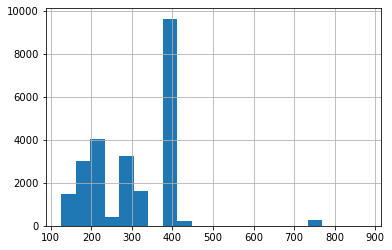

In [25]:
hist = policy_CENSAN_2months_20210317_df['grosspremium'].hist(bins=21)

<AxesSubplot:>

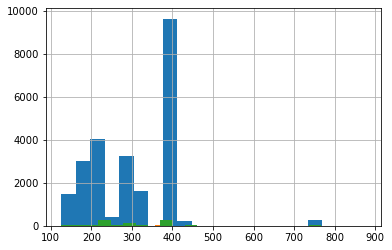

In [32]:
policy_CENSAN_2months_20210317_df['grosspremium'].hist(bins=21)
policy_cancelled_CENSAN_2months_20210317_df['grosspremium'].hist(bins=21)
policy_new_CENSAN_2months_20210317_df['grosspremium'].hist(bins=21)

In [ ]:
ax = policy_CENSAN_2months_20210317_df.hist(column='session_duration_seconds', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

<AxesSubplot:>

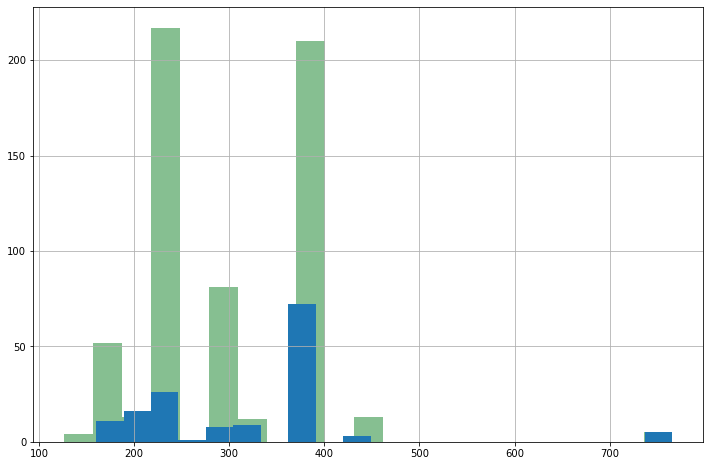

In [39]:
ax=policy_new_CENSAN_1months_20210317_df['grosspremium'].hist(bins=21, grid=False, figsize=(12,8), color='#86bf91')#, zorder=2, rwidth=0.9)
policy_cancelled_CENSAN_1months_20210317_df['grosspremium'].hist(bins=21)


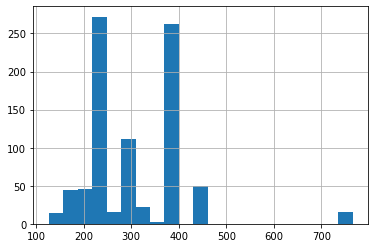

In [30]:
hist = policy_new_CENSAN_2months_20210317_df['grosspremium'].hist(bins=21)

All policies cancelled in the month still contributes to the active policy count for that month:

In [74]:
set(policy_cancelled_CENSAN_2months_20210317_df.policynumber)-set(policy_CENSAN_2months_20210317_df.policynumber)

set()

In [ ]:
set(policy_cancelled_CENSAN_1months_20210317_df.policynumber)-set(policy_CENSAN_1months_20210317_df.policynumber)

All policies cancelled in this month DOES NOT  contribute to the active policy count for the following month:

In [ ]:
len(set(policy_cancelled_CENSAN_2months_20210317_df.policynumber)-set(policy_CENSAN_1months_20210317_df.policynumber))

New policies in this month does not contribute to this months active policies:

In [ ]:
len(set(policy_new_CENSAN_2months_20210317_df.policynumber))

In [76]:
len(set(policy_new_CENSAN_2months_20210317_df.policynumber)-set(policy_CENSAN_2months_20210317_df.policynumber))

34

In [78]:
(set(policy_new_CENSAN_2months_20210317_df.policynumber)-set(policy_CENSAN_2months_20210317_df.policynumber))-set(policy_cancelled_CENSAN_2months_20210317_df.policynumber)

{'SAN713945',
 'SAN717676',
 'SAN721086',
 'SAN724898',
 'SAN737130',
 'SAN738327',
 'SAN738366',
 'SAN738367',
 'SAN738897',
 'SAN739142',
 'SAN742685',
 'SAN742781',
 'SAN743028',
 'SAN744652',
 'SAN744744',
 'SAN744966',
 'SAN745439',
 'SAN749516',
 'SAN749956',
 'SAN750222',
 'SAN750778',
 'SAN751053',
 'SAN752325',
 'SAN752371',
 'SAN752649',
 'SAN753974',
 'SAN756067',
 'SAN757109',
 'SAN757374',
 'SAN760251',
 'SAN761514',
 'SAN762875',
 'SAN763470',
 'SAN784780'}

In [83]:
len(set(policy_cancelled_CENSAN_2months_20210317_df.policynumber))

171

In [82]:
len(set(policy_cancelled_CENSAN_2months_20210317_df.policynumber)-set(policy_CENSAN_1months_20210317_df.policynumber))

171

In [80]:
len(set(policy_CENSAN_2months_20210317_df.policynumber)-set(policy_cancelled_CENSAN_2months_20210317_df.policynumber))

23777

The following is all policies for the last month excluding new policies for that month.  These policies should then balance with the previous month policies excluding cancelled policies as the are not in the nexth month policies any way:

In [85]:
set(policy_CENSAN_1months_20210317_df.policynumber)-set(policy_new_CENSAN_1months_20210317_df.policynumber)

{'SAN3015467',
 'SAN3009707',
 'SAN3020231',
 'SAN3014213',
 'SAN3021177',
 'SAN816572',
 'SAN3009457',
 'SAN3010265',
 'SAN3011765',
 'SAN3011467',
 'SAN3021838',
 'SAN3011001',
 'SAN0188803',
 'SAN3015614',
 'SAN3003356',
 'SAN753358',
 'SAN3010802',
 'SAN3020591',
 'SAN0098992',
 'SAN3021720',
 'SAN0141979',
 'SAN0080810',
 'SAN3013778',
 'SAN727976',
 'SAN3006406',
 'SAN3016181',
 'SAN3021506',
 'SAN3018988',
 'SAN3022285',
 'SAN3023856',
 'SAN3024480',
 'SAN737977',
 'SAN720127',
 'SAN722169',
 'SAN3023997',
 'SAN3017024',
 'SAN3012615',
 'SAN3021562',
 'SAN3010948',
 'SAN3014324',
 'SAN0042932',
 'SAN3030117',
 'SAN3004080',
 'SAN765493',
 'SAN3010482',
 'SAN3024058',
 'SAN3022620',
 'SAN3021216',
 'SAN3024225',
 'SAN0156972',
 'SAN0033049',
 'SAN3006663',
 'SAN0089975',
 'SAN3012181',
 'SAN0187635',
 'SAN3016048',
 'SAN3018822',
 'SAN3011582',
 'SAN0128608',
 'SAN3013401',
 'SAN0107282',
 'SAN0126109',
 'SAN3023345',
 'SAN3008114',
 'SAN758165',
 'SAN0116791',
 'SAN0007953',
 'S

In [87]:
len((set(policy_CENSAN_2months_20210317_df.policynumber)-set(policy_cancelled_CENSAN_2months_20210317_df.policynumber))-(set(policy_CENSAN_1months_20210317_df.policynumber)-set(policy_new_CENSAN_1months_20210317_df.policynumber)))

584

policynumbers below is ALL Jan policy numbers excluding Jan __cancelled__ policies but with __new__ Jan policies, So all valid policies at the end of Jan.
Then minus ALL Feb policies excluding new policies for Feb.  
This should be an empty set.

In [101]:
policy_numbers=((set(policy_CENSAN_2months_20210317_df.policynumber)-set(policy_cancelled_CENSAN_2months_20210317_df.policynumber))-(set(policy_CENSAN_1months_20210317_df.policynumber)-set(policy_new_CENSAN_1months_20210317_df.policynumber)))

In [102]:
policy_new_CENSAN_1months_20210317_df[policy_new_CENSAN_1months_20210317_df.policynumber.isin(policy_numbers)]['status']

0      Live
1      Live
3      Live
4      Live
5      Live
       ... 
602    Live
603    Live
604    Live
605    Live
606    Live
Name: status, Length: 584, dtype: object

In [107]:
len(policy_numbers)

584

In [108]:
policy_CENSAN_1months_20210317_df[policy_CENSAN_1months_20210317_df.policynumber.isin(policy_numbers)].shape

(584, 304)

In [109]:
policy_CENSAN_2months_20210317_df[policy_CENSAN_2months_20210317_df.policynumber.isin(policy_numbers)].shape

(584, 304)

In [110]:
policy_new_CENSAN_2months_20210317_df[policy_new_CENSAN_2months_20210317_df.policynumber.isin(policy_numbers)].shape

(0, 304)

In [111]:
policy_new_CENSAN_1months_20210317_df[policy_new_CENSAN_1months_20210317_df.policynumber.isin(policy_numbers)].shape

(584, 304)

In [112]:
policy_new_CENSAN_1months_20210317_df.shape

(607, 304)

There are some policies that are new for this month but not added to the current month active policies:

In [ ]:
len(set(policy_new_CENSAN_2months_20210317_df.policynumber)-set(policy_CENSAN_2months_20210317_df.policynumber))

In [ ]:
policy_new_CENSAN_2months_20210317_df[policy_new_CENSAN_2months_20210317_df.policynumber.isin(list(set(policy_new_CENSAN_2months_20210317_df.policynumber)-set(policy_CENSAN_2months_20210317_df.policynumber)))]

In [ ]:
policy_CENSAN_2months_20210317_df[policy_CENSAN_2months_20210317_df.policynumber.isin(list(set(policy_new_CENSAN_3months_20210317_df.policynumber)-set(policy_CENSAN_3months_20210317_df.policynumber)))]

There are some new policies that are not taking into account into the current month active policies:

In [ ]:
set(policy_new_CENSAN_3months_20210317_df.policynumber)-set(policy_CENSAN_3months_20210317_df.policynumber)

In [ ]:
set(policy_CENSAN_3months_20210317_df.policynumber)

In [ ]:
len(set(policy_new_CENSAN_3months_20210317_df.policynumber))

In [ ]:
len(set(policy_new_CENSAN_3months_20210317_df.policynumber)-set(policy_CENSAN_2months_20210317_df.policynumber))

In [ ]:
24080-302+552-42

In [ ]:
policy_new_CENSAN_3months_20210317_df[policy_new_CENSAN_3months_20210317_df.policynumber.isin(policy_cancelled_CENSAN_3months_20210317_df.policynumber)]['policynumber']

The following confirms that policies that are deemed to be new in this month may also be cancelled in the same month:

In [ ]:
policy_new_CENSAN_3months_20210317_df.shape

In [ ]:
set(policy_new_CENSAN_3months_20210317_df[policy_new_CENSAN_3months_20210317_df.policynumber.isin(policy_cancelled_CENSAN_3months_20210317_df.policynumber)]['policynumber'])-set(policy_CENSAN_2months_20210317_df.policynumber)

In [ ]:
set(policy_cancelled_CENSAN_3months_20210317_df.policynumber)-(set(policy_CENSAN_3months_20210317_df.policynumber)-set(policy_CENSAN_2months_20210317_df.policynumber))

In [ ]:
policy_CENSAN_3months_20210317_df.shape[0]-policy_CENSAN_2months_20210317_df.shape[0]

In [ ]:
len((set(policy_CENSAN_3months_20210317_df.policynumber)-set(policy_new_CENSAN_3months_20210317_df.policynumber)))

In [ ]:
set(policy_CENSAN_3months_20210317_df.policynumber)

In [ ]:
(set(policy_CENSAN_3months_20210317_df.policynumber)-set(policy_CENSAN_2months_20210317_df.policynumber))-set(policy_cancelled_CENSAN_3months_20210317_df.policynumber)

In [ ]:
A={1,2,3,4,5,6,7,8}

In [ ]:
B={1,2,3}

In [ ]:
C={9,10,11,12,13}

In [ ]:
s=(A-B)
s.update(C)

In [ ]:
A0=set(policy_CENSAN_3months_20210317_df.policynumber)-set(policy_new_CENSAN_3months_20210317_df.policynumber)

In [ ]:
A1=(set(policy_CENSAN_2months_20210317_df.policynumber)-set(policy_new_CENSAN_2months_20210317_df.policynumber))-set(policy_new_CENSAN_3months_20210317_df.policynumber)

In [ ]:
s=set(policy_CENSAN_2months_20210317_df.policynumber)-set(policy_cancelled_CENSAN_2months_20210317_df.policynumber)

In [ ]:
s.update(set(policy_new_CENSAN_2months_20210317_df.policynumber))

In [ ]:
len(set(policy_CENSAN_1months_20210317_df.policynumber)-s)

In [ ]:
l=set(policy_CENSAN_1months_20210317_df.policynumber)-s

In [ ]:
23959+854-171-605

In [ ]:
policy_CENSAN_1months_20210317_df[policy_CENSAN_1months_20210317_df.policynumber.isin(l)]

In [ ]:
policy_CENSAN_3months_20210317_df[policy_CENSAN_3months_20210317_df.policynumber.isin(l)].status

In [ ]:
len(set(policy_new_CENSAN_2months_20210317_df.policynumber)-set(policy_cancelled_CENSAN_2months_20210317_df.policynumber))

In [ ]:
set(policy_new_CENSAN_3months_20210317_df.status)

In [ ]:
policy_new_CENSAN_3months_20210317_df[policy_new_CENSAN_3months_20210317_df.status.isin(['Live'])]

In [ ]:
len({1,2,3,4,5}-{3})